In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
data = pd.read_csv(r"C:\Users\harri\Desktop\DataScienceProj\005_CarPurchase\autoscout-germany-dataset-revised.csv")

In [4]:
data.head(10)

,Unnamed: 0,mileage,make,model,fuel,gear,offerType,price,hp,year
0,0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011
5,5,147000,Toyota,Auris,Electric/Gasoline,Automatic,Used,6950,99.0,2011
6,6,91894,Renault,Scenic,Diesel,Manual,Used,6970,131.0,2011
7,7,127500,Opel,Zafira,Gasoline,Manual,Used,6972,116.0,2011
8,8,115000,Mazda,3,Gasoline,Automatic,Used,6980,150.0,2011
9,9,104,Ford,Transit,Diesel,Manual,Used,6990,86.0,2011


In [5]:
data.columns

Index(['Unnamed: 0', 'mileage', 'make', 'model', 'fuel', 'gear', 'offerType',
       'price', 'hp', 'year'],
      dtype='object')

In [6]:
data.drop('Unnamed: 0', inplace=True, axis=1)

In [7]:
data.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


All EV cars are automatic, not manual. All EVs are automatic. EVs are power-efficient throughout their revs, unlike fuel engines which have a narrow rev band in which they can deliver maximum performance. EVs need only one gear.(based on https://www.rivervaleleasing.co.uk/guides/electric-vehicle-leasing/are-electric-cars-automatic-or-manual#:~:text=reach%20maximum%20torque.-,Are%20electric%20cars%20automatic%20or%20manual%3F,EVs%20need%20only%20one%20gear.)

However, there is a few companies started to invent EV cars with manual transmission and introduced it around 2022 and it is still new!! (based on https://www.motorbiscuit.com/electric-vehicles-manual-transmissions/ and https://robbreport.com/motors/cars/manual-transmission-electric-vehicles-future-1234774864/)

In [8]:
gear_data = dict(data["gear"].value_counts())
gear_data

{'Manual': 30309, 'Automatic': 15706, 'Semi-automatic': 56}

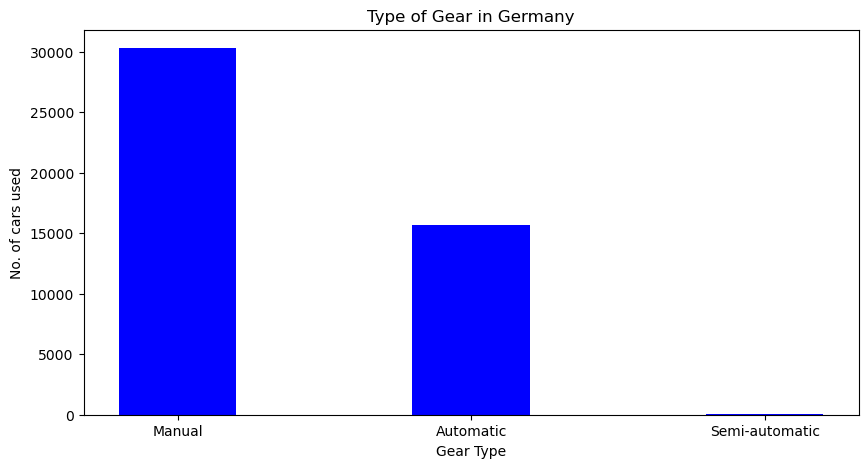

In [10]:
cat = list(gear_data.keys())
freq = list(gear_data.values())
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(cat, freq,color ='blue',
        width = 0.4, label = list(map(str,gear_data.values())))
 
plt.xlabel("Gear Type")
plt.ylabel("No. of cars used")
plt.title("Type of Gear in Germany")
plt.show()

Based on the bar chart, cars with manual transmission are two times bigger than cars with automatics and it is less amount of cars with semi-automatic.

In [61]:
#check data with manual gear type
data.query('gear =="Manual"')


,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011
...,...,...,...,...,...,...,...,...,...
46066,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46067,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46068,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46069,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021


In [69]:
data["price"].min()

1100

In [62]:
data.query('gear =="Manual"')["fuel"].value_counts()

Gasoline             21804
Diesel                7922
Electric/Gasoline      301
LPG                    109
CNG                     95
Others                  37
-/- (Fuel)              16
Electric                16
Electric/Diesel          7
Ethanol                  2
Name: fuel, dtype: int64

Impossible! Records with manual gear should not have electric fuel.  

In [63]:
data.query('gear =="Manual" & fuel =="Electric/Gasoline"')

,mileage,make,model,fuel,gear,offerType,price,hp,year
195,15,Fiat,Panda,Electric/Gasoline,Manual,Pre-registered,10680,69.0,2021
197,15,Fiat,Panda,Electric/Gasoline,Manual,Pre-registered,10980,69.0,2021
198,15,Fiat,Panda,Electric/Gasoline,Manual,Pre-registered,10980,69.0,2021
394,9990,Ford,Fiesta,Electric/Gasoline,Manual,Employee's car,15970,125.0,2020
395,6315,Ford,Fiesta,Electric/Gasoline,Manual,Employee's car,16450,125.0,2020
...,...,...,...,...,...,...,...,...,...
46066,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46067,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46068,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46069,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021


In [66]:
data.query('gear =="Manual" & fuel =="Electric/Gasoline" & make =="Fiat"')

,mileage,make,model,fuel,gear,offerType,price,hp,year
195,15,Fiat,Panda,Electric/Gasoline,Manual,Pre-registered,10680,69.0,2021
197,15,Fiat,Panda,Electric/Gasoline,Manual,Pre-registered,10980,69.0,2021
198,15,Fiat,Panda,Electric/Gasoline,Manual,Pre-registered,10980,69.0,2021
999,10,Fiat,500C,Electric/Gasoline,Manual,Pre-registered,15990,69.0,2021
1000,10,Fiat,500C,Electric/Gasoline,Manual,Pre-registered,15990,69.0,2021
...,...,...,...,...,...,...,...,...,...
46066,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46067,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46068,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46069,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021


In [70]:
data.query('gear =="Manual" & fuel =="Electric/Gasoline" & make =="Fiat"')["offerType"].value_counts()

Pre-registered    134
Demonstration      23
Used                7
Name: offerType, dtype: int64

In [ ]:
data.query('gear =="Manual" & fuel =="Electric/Gasoline" & make =="Fiat"')["model"].value_counts()

In [60]:
#dfObj[(dfObj['Sale'] > 30) & (dfObj['Sale'] < 33) ]
temp2 = temp1.query('make=="Fiat" & model == "500"')
temp2

,mileage,make,model,fuel,gear,offerType,price,hp,year
1645,10,Fiat,500,Electric/Gasoline,Manual,Pre-registered,11488,69.0,2021
1836,15,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12780,69.0,2021
2647,1111,Fiat,500,Electric/Gasoline,Manual,Pre-registered,13090,69.0,2020
2648,1111,Fiat,500,Electric/Gasoline,Manual,Pre-registered,13090,69.0,2020
2649,1111,Fiat,500,Electric/Gasoline,Manual,Pre-registered,13090,69.0,2020
...,...,...,...,...,...,...,...,...,...
46066,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46067,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46068,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46069,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021


In [44]:
manual_gear_data[manual_gear_data["fuel"]=="Electric/Gasoline"]["make"].value_counts()

Fiat          164
Ford           69
Suzuki         27
Hyundai        21
Mazda          14
Honda           4
Toyota          1
Volkswagen      1
Name: make, dtype: int64

In [30]:
fuel_feat = dict(data["fuel"].value_counts())
fuel_feat

{'Gasoline': 28720,
 'Diesel': 15178,
 'Electric/Gasoline': 1146,
 'Electric': 661,
 'LPG': 125,
 'CNG': 116,
 'Electric/Diesel': 53,
 'Others': 47,
 '-/- (Fuel)': 22,
 'Ethanol': 2,
 'Hydrogen': 1}

In [31]:
len(fuel_feat)

11

ICE - Gasoline, Diesel, LPG, CNG, Ethanol, Hydrogen, -/- (Fuel), 
EV - Electric/Gasoline, Electric, Electric/Diesel

In [33]:
temp_data = data[data["fuel"]=="Electric/Gasoline"]
temp_data

,mileage,make,model,fuel,gear,offerType,price,hp,year
5,147000,Toyota,Auris,Electric/Gasoline,Automatic,Used,6950,99.0,2011
63,84600,Toyota,Yaris,Electric/Gasoline,Automatic,Used,8990,143.0,2014
175,23490,Audi,A6,Electric/Gasoline,Automatic,Used,59440,367.0,2020
176,19000,Audi,Q5,Electric/Gasoline,Automatic,Demonstration,59850,367.0,2020
184,999,Audi,A7,Electric/Gasoline,Automatic,Used,66890,367.0,2020
...,...,...,...,...,...,...,...,...,...
46066,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46067,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46068,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46069,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021


In [34]:
temp_data["gear"].value_counts()

Automatic    845
Manual       301
Name: gear, dtype: int64

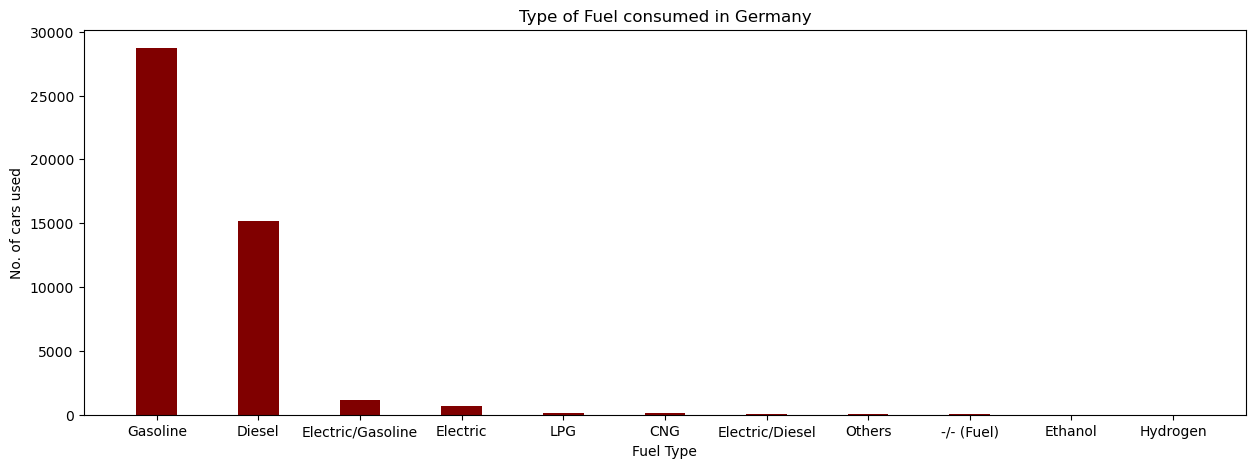

In [37]:
cat = list(fuel_feat.keys())
freq = list(fuel_feat.values())
fig = plt.figure(figsize = (15, 5))
 
# creating the bar plot
plt.bar(cat, freq,color ='maroon',
        width = 0.4, label = list(map(str,fuel_feat.values())))
 
plt.xlabel("Fuel Type")
plt.ylabel("No. of cars used")
plt.title("Type of Fuel consumed in Germany")
plt.show()

In [15]:
data["offerType"].value_counts()

Used              39822
Pre-registered     2768
Demonstration      2351
Employee's car     1117
New                  13
Name: offerType, dtype: int64

In [14]:
data["gear"].value_counts()

Manual            30309
Automatic         15706
Semi-automatic       56
Name: gear, dtype: int64